In [1]:
import pandas as pd

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from sklearn.feature_extraction import DictVectorizer

In [2]:
df = pd.read_parquet("./data/green_tripdata_2022-01.parquet")

In [3]:
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

In [4]:
df["duration"] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

In [ ]:
df.duration.apply(lambda td: td.total_seconds() / 60 )

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

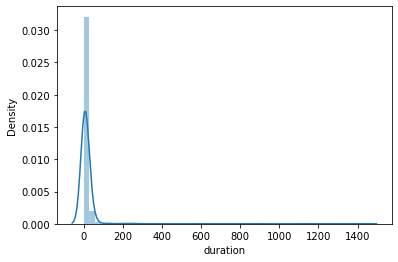

In [12]:
sns.distplot(df.duration)

In [13]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [16]:
categorical = ["PULocationID" , "DOLocationID"]
numerical = ["trip_distance"]

In [21]:
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_42454/1767203464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [19]:
train_dicts = df[categorical + numerical].to_dict(orient = "records")

In [23]:
dv = DictVectorizer()

In [24]:
X_train = dv.fit_transform(train_dicts)

In [25]:
X_train

<1310x329 sparse matrix of type '<class 'numpy.float64'>'
	with 3930 stored elements in Compressed Sparse Row format>

In [29]:
target = "duration"
y_train = df[target].values

In [30]:
y_train

array([14.43333333, 22.36666667, 15.8       , ...,  9.23333333,
       11.88333333, 13.08333333])